In [1]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-11-13 13:48:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.08s   

2020-11-13 13:48:46 (271 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [2]:
import pandas as pd
train=pd.read_csv("loan_train.csv")
train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-11-13 13:48:47--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-11-13 13:48:48 (85.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
test=pd.read_csv("loan_test.csv")
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [6]:
df=[train,test]
for i in df:
    i['Gender']=i['Gender'].map({"female":0,"male":1}).astype(int)
    
train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,1
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,0
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,1
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,0
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,1


In [7]:
onehot=pd.get_dummies(train["education"])
#Feature=train[['Principal','terms','age','Gender']]
Feature=pd.concat([train[['Principal','terms','age','Gender']],onehot],axis=1).drop("Master or Above",axis=1)
Feature

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,1,0,1,0
1,1000,30,33,0,1,0,0
2,1000,15,27,1,0,0,1
3,1000,30,28,0,0,0,1
4,1000,30,29,1,0,0,1
...,...,...,...,...,...,...,...
341,800,15,32,1,0,1,0
342,1000,30,25,1,0,1,0
343,800,15,39,1,0,0,1
344,1000,30,28,1,0,0,1


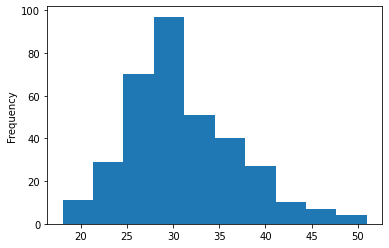

In [8]:
train["age"].plot(kind="hist")

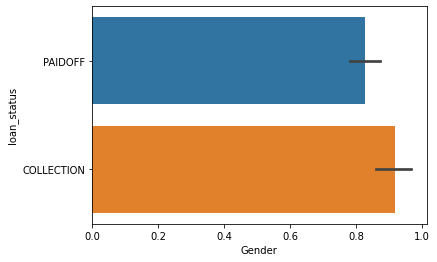

In [9]:
sns.barplot(x="Gender",y="loan_status",data=train)

In [10]:
X=Feature
y=train["loan_status"].values

# Train Test Split


In [11]:
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [12]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.42056004, -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -2.37778177,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42056004, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, -2.37778177, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42056004, -0.38170062,
        -0.87997669,  1.14984679]])

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# K - Nearest Neighbor

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

In [16]:
ar=np.zeros((9))
std_acc=np.zeros((9))
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_hat=knn.predict(X_test)
    ar[i-1]=metrics.accuracy_score(y_test, y_hat)
    std_acc[i-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
    


print("The best accuracy was",ar.max(),"with ka =",ar.argmax()+1)
#print("Jaccard Score :", jaccard_score(y_test,KNeighborsClassifier(n_neighbors=ar.argmax()+1).fit(X_train,y_train).predict(X_test)),average='weighted')
#print("F1 Score :",f1_score(y_test,y_hat,average='weighted'))

The best accuracy was 0.8 with ka = 9


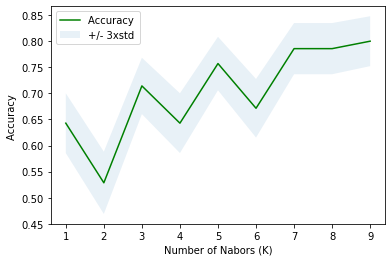

In [17]:
plt.plot(range(1,10),ar,'g')
plt.fill_between(range(1,10),ar - 1 * std_acc,ar + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
#plt.tight_layout()
plt.show()

# Decision Trees


In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(X_train,y_train)
predTree = tree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.7428571428571429


# SVM

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma="auto")
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print(" Accuracy: ", metrics.accuracy_score(y_test, yhat))


 Accuracy:  0.8


In [20]:
metrics.accuracy_score(y_train, clf.predict(X_train))

0.7391304347826086

# Logistic Regresion

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [22]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:5]

array([[0.42315812, 0.57684188],
       [0.40018807, 0.59981193],
       [0.44366848, 0.55633152],
       [0.35849286, 0.64150714],
       [0.38821946, 0.61178054]])

In [23]:
log_loss(y_test, yhat_prob)

0.5989835988639347

In [24]:
jaccard_score(y_test, yhat, average='weighted')

0.64

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.80      1.00      0.89        56

    accuracy                           0.80        70
   macro avg       0.40      0.50      0.44        70
weighted avg       0.64      0.80      0.71        70



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test Data

In [27]:
test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,0
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,1
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,0
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,1
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,1


In [28]:
onehot=pd.get_dummies(test["education"])
test_y=test["loan_status"].values
#Feature=train[['Principal','terms','age','Gender']]
test=pd.concat([test[['Principal','terms','age','Gender']],onehot],axis=1).drop("Master or Above",axis=1)
x_test=test

In [29]:
x_test = preprocessing.StandardScaler().fit(x_test).transform(x_test)
x_test[:5]

array([[ 0.49362588,  0.92844966,  3.05981865, -1.97714211,  2.39791576,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288,  0.50578054, -0.41702883,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596, -1.97714211, -0.41702883,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057,  0.50578054, -0.41702883,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942,  0.50578054,  2.39791576,
        -0.79772404, -0.86135677]])

# The best classifier

In [30]:
knn_hat=knn.predict(x_test)
tree_hat=tree.predict(x_test)
svm_hat=clf.predict(x_test)
lr_hat=LR.predict(x_test)
lr_probhat=LR.predict_proba(x_test)

In [34]:

from tabulate import tabulate
print(tabulate([['KNN', jaccard_score(test_y, knn_hat,average="weighted"),f1_score(test_y, knn_hat, average='weighted'),'NA'], 
                ['Decision Tree', jaccard_score(test_y, tree_hat,average="weighted"),f1_score(test_y, tree_hat, average='weighted'),'NA'],
               ['SVM', jaccard_score(test_y, svm_hat,average="weighted"), f1_score(test_y, svm_hat, average='weighted'),'NA'],
               ['Logistic Regression', jaccard_score(test_y,lr_hat,average="weighted"), f1_score(test_y,lr_hat, average='weighted'),log_loss(test_y,lr_probhat)]], 
               headers=['Algorithm', 'Jaccard','F1-score','LogLoss']))

Algorithm              Jaccard    F1-score  LogLoss
-------------------  ---------  ----------  ------------------
KNN                   0.521262    0.611916  NA
Decision Tree         0.562357    0.660427  NA
SVM                   0.548697    0.630418  NA
Logistic Regression   0.548697    0.630418  0.6089537472456663


The best accuracy is given by Decision Tree